In [11]:
import requests
import json
import numpy as np
import pandas as pd
import getpass
from shapely.geometry import Point, Polygon
import geopandas as gpd
from geopandas import GeoDataFrame

In [14]:
root = "https://api.claro-br.kidodynamics.com/v1/"

In [5]:
cells = [3955, 18505, 47652, 56833, 68676, 86100, 127553, 148628, 200132, 211037, 217324, 240236] 

## Login

In [ ]:
gabrieljunqueirasouza@hotmail.com

p6JV_(D?HAVQ

In [12]:
user = input('Enter username:')
password = getpass.getpass('Pass')

Enter username:gabrieljunqueirasouza@hotmail.com
Pass········


In [15]:
login_response = requests.post(
    root + 'users/login',
    headers={
        'accept': 'application/json',
        'Content-Type': 'application/x-www-form-urlencoded',
    },
    data=f'grant_type=&username={user}&password={password}'
)
token = login_response.json()['access_token']

In [16]:
def headers(token):
    return {
        'accept': 'application/json',
        'Authorization': f"Bearer {token}"
    }

## Getting the data from the cells

In [71]:
DF = pd.DataFrame()

for cell in cells:
    
    url = f"https://api.claro-br.kidodynamics.com/v1/retail/overview/2022-10-01/2022-10-01/{cell}?agent_type=National"

    response = requests.get(url, headers=headers(token))
    data = json.loads(response.text)

    # #df["cell"] = cell
    # df["total_visits"] = data["data"]["total_visits"]
    # df["residents"] = data["data"]["residents"]
    # df["regulars"] = data["data"]["regulars"]
    # df["visitors"] = data["data"]["visitors"]["total"]
    # df["int_visitors"] = data["data"]["visitors"]["internationals"]
    # df["nat_visitors"] = data["data"]["visitors"]["nationals"]

    d = {'total_visits': data["data"]["total_visits"],
     'visitors': data["data"]["visitors"]["total"],
     'international visitors': data["data"]["visitors"]["internationals"],
     'national visitors': data["data"]["visitors"]["nationals"],
     'residents': data["data"]["residents"],
     'regulars': data["data"]["regulars"]}

    df = pd.DataFrame(d, index=[0])
    df["cell"] = cell
    
    DF = pd.concat([DF, df], axis=0, ignore_index=True)



In [72]:
DF

,total_visits,visitors,international visitors,national visitors,residents,regulars,cell
0,2861,763,3,760,1869,229,3955
1,1903,333,0,333,1232,338,18505
2,0,0,0,0,0,0,47652
3,2001,648,0,648,996,357,56833
4,0,0,0,0,0,0,68676
5,374,136,0,136,144,94,86100
6,8066,3067,2,3065,3542,1457,127553
7,2838,1147,1,1146,1160,531,148628
8,5353,2112,2,2110,2322,919,200132
9,526,193,0,193,199,134,211037


In [73]:
DF2 = DF[["cell","total_visits", "residents", "regulars", "visitors", "national visitors", "international visitors"]]

In [74]:
DF2

,cell,total_visits,residents,regulars,visitors,national visitors,international visitors
0,3955,2861,1869,229,763,760,3
1,18505,1903,1232,338,333,333,0
2,47652,0,0,0,0,0,0
3,56833,2001,996,357,648,648,0
4,68676,0,0,0,0,0,0
5,86100,374,144,94,136,136,0
6,127553,8066,3542,1457,3067,3065,2
7,148628,2838,1160,531,1147,1146,1
8,200132,5353,2322,919,2112,2110,2
9,211037,526,199,134,193,193,0


In [75]:
plot_df = DF2[["cell", "visitors", "regulars", "residents"]]

In [84]:
import matplotlib.pyplot as plt

df = plot_df[plot_df["visitors"] != 0]

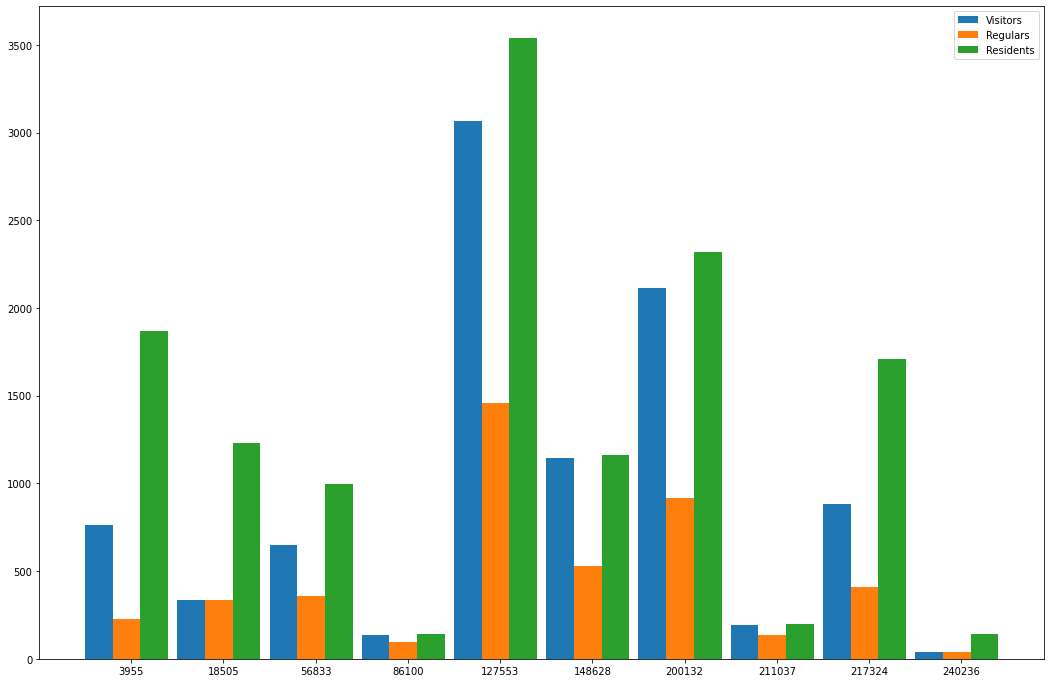

In [93]:
# Data for first bar plot
data1 = df['visitors']

# Data for second bar plot
data2 = df['regulars']

# Data for third bar plot
data3 = df['residents']

# Cells
cells = df.cell

# Create figure and axes
fig, ax = plt.subplots(figsize=(18,12))

# Plot first bar plot
ax.bar(np.arange(len(data1)), data1, width=0.3, align='edge', label='Visitors')

# Plot second bar plot
ax.bar(np.arange(len(data2))+0.3, data2, width=0.3, align='edge', label='Regulars')

# Plot third bar plot
ax.bar(np.arange(len(data3))+0.6, data3, width=0.3, align='edge', label='Residents')

# Set x-axis labels
ax.set_xticks(np.arange(len(data1))+0.5)
ax.set_xticklabels(cells)

ax.legend()
plt.show()

In [94]:
df

,cell,visitors,regulars,residents
0,3955,763,229,1869
1,18505,333,338,1232
3,56833,648,357,996
5,86100,136,94,144
6,127553,3067,1457,3542
7,148628,1147,531,1160
8,200132,2112,919,2322
9,211037,193,134,199
10,217324,880,409,1712
11,240236,38,39,142


In [114]:
df2 = DF2[["total_visits","visitors", "regulars", "residents"]]

In [111]:
df_sum = df2.sum(axis=0)

In [115]:
df_sum2 = df2.sum(axis=0)

Number of visits made to the area on 01/oct/2022: 27142


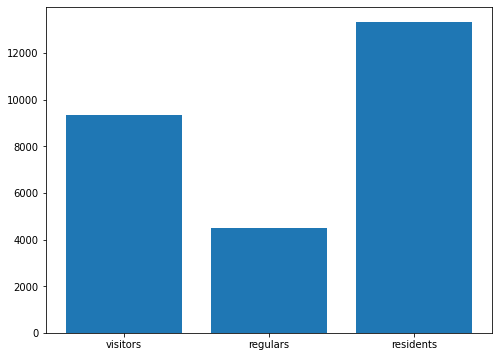

In [119]:

print("Number of visits made to the area on 01/oct/2022: " + str(df_sum2["total_visits"]))
# Data
data = df_sum.values

# Labels
labels = df_sum.index

# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar plot
ax.bar(range(len(data)), data)

# Set x-axis labels
ax.set_xticks(range(len(data)))
ax.set_xticklabels(labels)

plt.show()

